# Matplitlob Introduction
1. Before importing packages in the code below, check the following.
2. In the top right, select bas(Python 3.10.9).
3. If still stuck, reference the following video: [click here](https://www.youtube.com/watch?v=qL0Kb_9BquQ).

In [441]:
import numpy as np
print("numpy version: ", np.__version__)
import matplotlib as mpl
print("matplotlb version: ", mpl.__version__)
import matplotlib.pyplot as plt
import pandas as pd

numpy version:  1.22.3
matplotlb version:  3.7.0


#### The following is a simple plot of a singular point denoted by a circle.

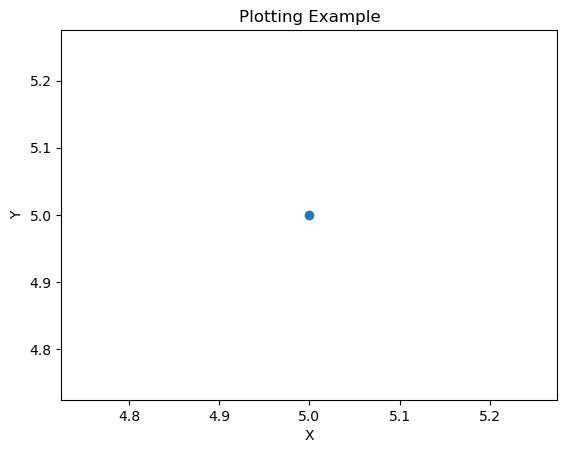

In [255]:
plt.plot(5,5,'o')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Plotting Example")
plt.show()

##### If we want to continue to add to the same graph without rendering an entirely new one every time, we can call "%matplotlib notebook" before our import statement to do so.

##### We are now creating a dictionary, casting it as a data frame, and checking that the information shows up correctly.

In [256]:
# Create a dictionary
dict = {'Animal':['lion','dog','penguin','cow','cat','mouse','rat','flamingo'], 'Cool Factor':[5,8,10,7,3,2,6,7], 'Habitat':['zoo','house','arctic','farm','house','house','subway','zoo'],'Number of Pets':[2,105,4,85,58,13,45,30],'Random':[0,3,4,2,43,2,4,4]}
# Cast it as a data frame
df = pd.DataFrame(dict) 
# Print it
df

,Animal,Cool Factor,Habitat,Number of Pets,Random
0,lion,5,zoo,2,0
1,dog,8,house,105,3
2,penguin,10,arctic,4,4
3,cow,7,farm,85,2
4,cat,3,house,58,43
5,mouse,2,house,13,2
6,rat,6,subway,45,4
7,flamingo,7,zoo,30,4


In [257]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Columns: 5 entries, Animal to Random
dtypes: int64(3), object(2)
memory usage: 448.0+ bytes


In [258]:
# get more useful information about our data frame
df.columns

Index(['Animal', 'Cool Factor', 'Habitat', 'Number of Pets', 'Random'], dtype='object')

In [259]:
df.index

RangeIndex(start=0, stop=8, step=1)

In [260]:
# We can convert the column names and indices to a list
df.columns.tolist()
df.index.tolist()

[0, 1, 2, 3, 4, 5, 6, 7]

In [261]:
#get dimensions
df.shape

(8, 5)

In [262]:
df.rename(columns={'Random':'Useless Column'}, inplace=True)
df.columns

Index(['Animal', 'Cool Factor', 'Habitat', 'Number of Pets', 'Useless Column'], dtype='object')

In [263]:
df.drop(['Useless Column'], axis=1, inplace=True)
df.head(3)

,Animal,Cool Factor,Habitat,Number of Pets
0,lion,5,zoo,2
1,dog,8,house,105
2,penguin,10,arctic,4


In [264]:
# 1. create the condition boolean series
condition = df['Habitat'] == 'zoo'
print(condition)

0     True
1    False
2    False
3    False
4    False
5    False
6    False
7     True
Name: Habitat, dtype: bool


In [265]:
# 2. pass this condition into the dataFrame
df[condition]

,Animal,Cool Factor,Habitat,Number of Pets
0,lion,5,zoo,2
7,flamingo,7,zoo,30


In [266]:
# we can pass multiple criteria in the same line.
df[(df['Habitat']=='house') & (df['Cool Factor']>4)]
# note: When using 'and' and 'or' operators, pandas requires we use '&' and '|' instead of 'and' and 'or'
# don't forget to enclose the two conditions in parentheses

,Animal,Cool Factor,Habitat,Number of Pets
1,dog,8,house,105


In [267]:
df.Animal  # returns a series

0        lion
1         dog
2     penguin
3         cow
4         cat
5       mouse
6         rat
7    flamingo
Name: Animal, dtype: object

In [268]:
df[['Animal']] # returns a dataframe

,Animal
0,lion
1,dog
2,penguin
3,cow
4,cat
5,mouse
6,rat
7,flamingo


### Select Row

There are main 2 ways to select rows:

```python
    df.loc[label]    # filters by the labels of the index/column
    df.iloc[index]   # filters by the positions of the index/column
```


In [269]:
df.set_index('Animal', inplace=True)
# tip: The opposite of set is reset. So to reset the index, we can use df_can.reset_index()
# optional: to remove the name of the index
#df.index.name = None

In [271]:
# obtain details of a full row using the index identifier
df.loc['dog']

Cool Factor           8
Habitat           house
Number of Pets      105
Name: dog, dtype: object

In [272]:
# obtain details of a rull row using the numebrical index
df.iloc[1]

Cool Factor           8
Habitat           house
Number of Pets      105
Name: dog, dtype: object

In [273]:
# locate a specific cell
df.iloc[1, 0]

8

In [274]:
# sub data frame
df.iloc[1:3, 0:4]

,Cool Factor,Habitat,Number of Pets
Animal,,,
dog,8,house,105
penguin,10,arctic,4


<Axes: ylabel='Frequency'>

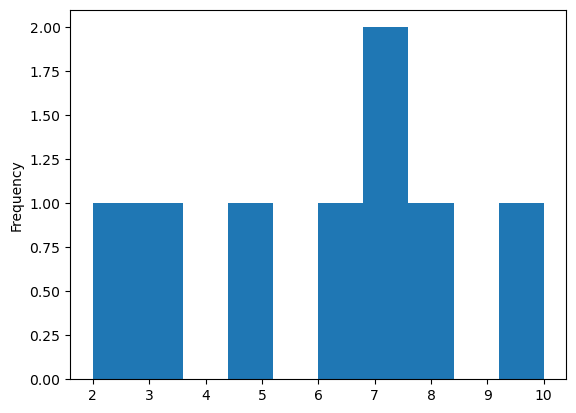

In [24]:
# Create a histogram for the Cool Factor
df["Cool Factor"].plot(kind="hist")

##### Reading data into Pandas Dataframe
1. Import numpy
2. Import pandas
3. import future

In [25]:
from __future__ import print_function
# this allows us to read in from excl spreadsheet files
!pip install xlrd
print('xlrd installed!')
import csv

xlrd installed!


##### Now, we are reading a csv file from the IBM public datasets called "Predicting Wildfires with Weather Forecast Data". It can be found [here](https://developer.ibm.com/data/spot-challenge-wildfires/).

In [26]:
# We are using the pandas read function and using 
# the path to the file which is just on my desktop
df_wildfire = pd.read_csv('Desktop/submission-example.csv')
# Print out the first ten rows to ensure correctness
df_wildfire.head(10)

,Region,Date,Estimated_fire_area
0,NWS,1-Feb,25.138971
1,NWS,2-Feb,131.277615
2,NWS,3-Feb,16.896662
3,NWS,4-Feb,30.512019
4,NWS,5-Feb,16.888861
5,NWS,6-Feb,92.024374
6,NWS,7-Feb,176.413788
7,NWS,8-Feb,502.170652
8,NWS,9-Feb,209.345048
9,NWS,10-Feb,651.021248


In [27]:
df_wildfire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region               196 non-null    object 
 1   Date                 196 non-null    object 
 2   Estimated_fire_area  196 non-null    float64
dtypes: float64(1), object(2)
memory usage: 4.7+ KB


In [236]:
# Count how many values are null in df
df_wildfire.isnull().sum()

Region                 0
Date                   0
Estimated_fire_area    0
dtype: int64

In [28]:
# print the different regions and how many rows of each we have
df_wildfire['Region'].value_counts().to_frame()

,Region
NWS,28
NT,28
QL,28
SA,28
TA,28
VI,28
WA,28


In [29]:
# Create a data frame only looking at one region
df_new = df_wildfire[df_wildfire['Region']=="VI"]
df_new

,Region,Date,Estimated_fire_area
140,VI,1-Feb,2.813065
141,VI,2-Feb,0.963580
142,VI,3-Feb,974.632530
143,VI,4-Feb,4.496333
144,VI,5-Feb,946.153057
145,VI,6-Feb,61.497351
146,VI,7-Feb,978.573361
147,VI,8-Feb,316.080331
148,VI,9-Feb,31.783529
149,VI,10-Feb,34.044854


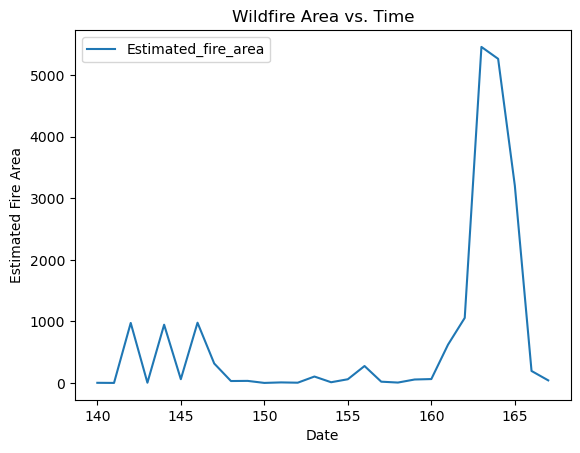

In [30]:
# Use a lineplot to see trends in fire area in VI region
df_new[["Date","Estimated_fire_area"]].plot(kind='line')
plt.title("Wildfire Area vs. Time")
plt.xlabel("Date")
plt.ylabel("Estimated Fire Area")
plt.show()

In [376]:
dict2 = {
    'City':['Fun Town', 'Silly City', 'Tree Grove','Big City','Star Town','River Valley','Catville','Small Town','Big Town','Centreville'],
    '2000':[200,345,679,402,238,564,329,500,459,620],
    '2001':[202,365,653,402,245,550,350,521,461,626],
    '2002':[207,370,614,400,257,573,362,550,467,634],
    '2003':[280,382,642,413,268,580,367,523,480,650],
    '2004':[256,405,670,478,293,587,375,533,490,623],
    '2005':[311,430,679,509,280,592,340,540,504,606],
    '2006':[390,455,690,500,301,599,330,536,526,620],
    '2007':[412,500,712,532,323,601,342,548,560,630],
    '2008':[396,495,720,555,345,598,356,556,589,634],
    '2009':[431,482,764,574,380,605,380,567,608,650],
}

df2 = pd.DataFrame(dict2)
# Set the row index by the city
# THIS IS SUPER IMPORTANT
df2 = df2.set_index('City')
df2
# to remove the name of the index
#df2.index.name = None


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
City,,,,,,,,,,
Fun Town,200,202,207,280,256,311,390,412,396,431
Silly City,345,365,370,382,405,430,455,500,495,482
Tree Grove,679,653,614,642,670,679,690,712,720,764
Big City,402,402,400,413,478,509,500,532,555,574
Star Town,238,245,257,268,293,280,301,323,345,380
River Valley,564,550,573,580,587,592,599,601,598,605
Catville,329,350,362,367,375,340,330,342,356,380
Small Town,500,521,550,523,533,540,536,548,556,567
Big Town,459,461,467,480,490,504,526,560,589,608


In [377]:
# Making a Sum Column
df2['Total'] = df2.sum(axis=1)
df2.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,Total
City,,,,,,,,,,,
Fun Town,200,202,207,280,256,311,390,412,396,431,3085
Silly City,345,365,370,382,405,430,455,500,495,482,4229
Tree Grove,679,653,614,642,670,679,690,712,720,764,6823
Big City,402,402,400,413,478,509,500,532,555,574,4765
Star Town,238,245,257,268,293,280,301,323,345,380,2930


In [378]:
df2.drop(['Total'], axis=1, inplace=True)
df2.head(3)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
City,,,,,,,,,,
Fun Town,200,202,207,280,256,311,390,412,396,431
Silly City,345,365,370,382,405,430,455,500,495,482
Tree Grove,679,653,614,642,670,679,690,712,720,764


In [379]:
# Making aa Average Column
df2['avg_pop'] = df2.mean(axis=1)
df2

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,avg_pop
City,,,,,,,,,,,
Fun Town,200,202,207,280,256,311,390,412,396,431,308.5
Silly City,345,365,370,382,405,430,455,500,495,482,422.9
Tree Grove,679,653,614,642,670,679,690,712,720,764,682.3
Big City,402,402,400,413,478,509,500,532,555,574,476.5
Star Town,238,245,257,268,293,280,301,323,345,380,293.0
River Valley,564,550,573,580,587,592,599,601,598,605,584.9
Catville,329,350,362,367,375,340,330,342,356,380,353.1
Small Town,500,521,550,523,533,540,536,548,556,567,537.4
Big Town,459,461,467,480,490,504,526,560,589,608,514.4


##### Now, we will look at all different types of plots

1. The area plot: it is an extension of the line plot.
Let's plot the most populous citites.


In [143]:
years = list(map(str, range(2000,2009)))
df2.sort_values(['avg_pop'], ascending=False, axis=0, inplace=True)
df_top5=df2.head()
df_top5 = df_top5[years].transpose()
df_top5

City,Tree Grove,Centreville,River Valley,Small Town,Big Town
2000,679,620,564,500,459
2001,653,626,550,521,461
2002,614,634,573,550,467
2003,642,650,580,523,480
2004,670,623,587,533,490
2005,679,606,592,540,504
2006,690,620,599,536,526
2007,712,630,601,548,560
2008,720,634,598,556,589


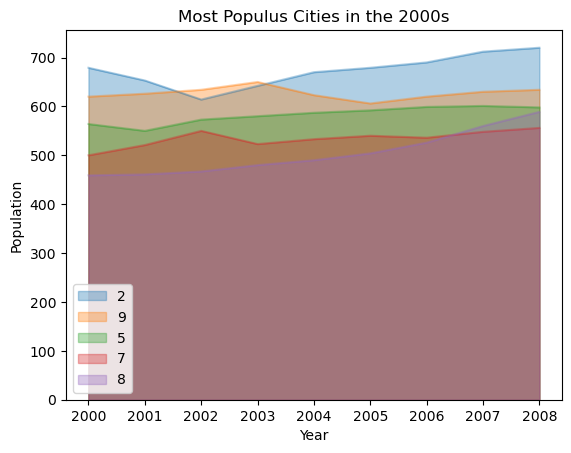

In [76]:
df_top5.plot(kind='area',stacked=False,alpha=0.35)
plt.title("Most Populus Cities in the 2000s")
plt.xlabel("Year")
plt.ylabel("Population")
plt.show()

2. Histogram: represents the frequency distribution of a variable. 

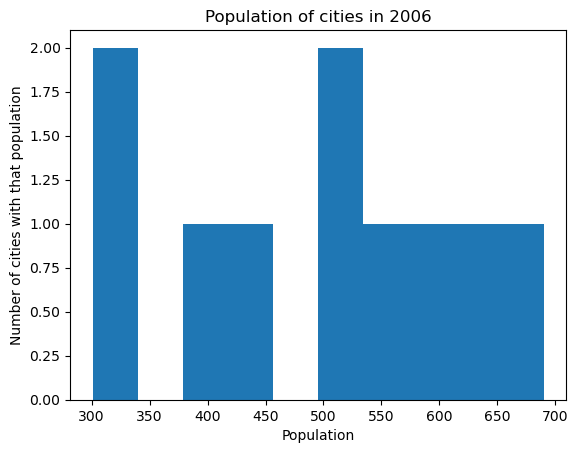

In [51]:
df2['2006'].plot(kind='hist')
plt.title("Population of cities in 2006")
plt.xlabel("Population")
plt.ylabel("Number of cities with that population")
plt.show()

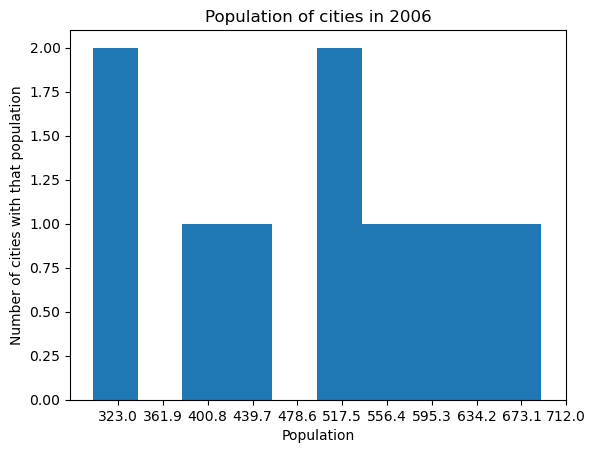

In [52]:
count, bin_edges = np.histogram(df2['2007'])
df2['2006'].plot(kind='hist',xticks=bin_edges)
plt.title("Population of cities in 2006")
plt.xlabel("Population")
plt.ylabel("Number of cities with that population")
plt.show()

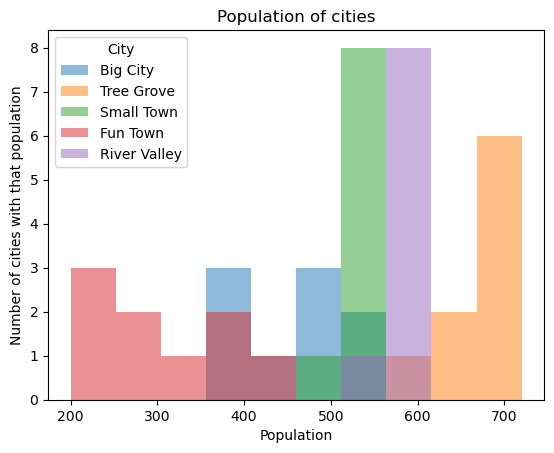

In [116]:
years = list(map(str, range(2000,2009)))
df_t = df2.loc[['Big City','Tree Grove', 'Small Town','Fun Town','River Valley'],years]
df_t = df_t.transpose()
df_t.plot(kind='hist',alpha=0.5)
plt.title("Population of cities in the 2000s")
plt.xlabel("Population")
plt.ylabel("Number of cities with that population")
plt.show()

3. Bar Charts: compare the values of a variable at a given point in time.

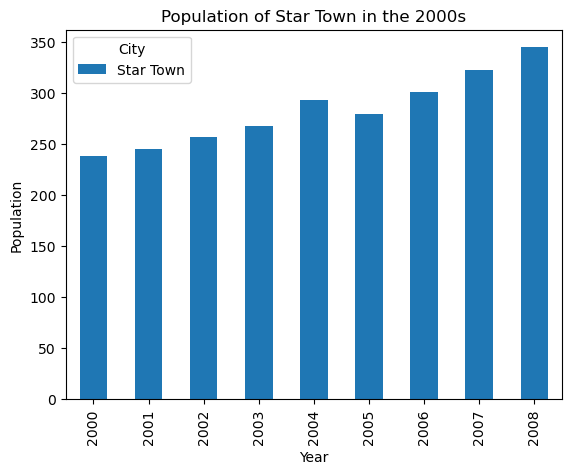

In [111]:
years = list(map(str, range(2000,2009)))
df_st = df2.loc[['Star Town'],years]
df_st = df_st.transpose()
df_st.plot(kind='bar')
plt.title("Population of Star Town in the 2000s")
plt.xlabel("Year")
plt.ylabel("Population")
plt.show()

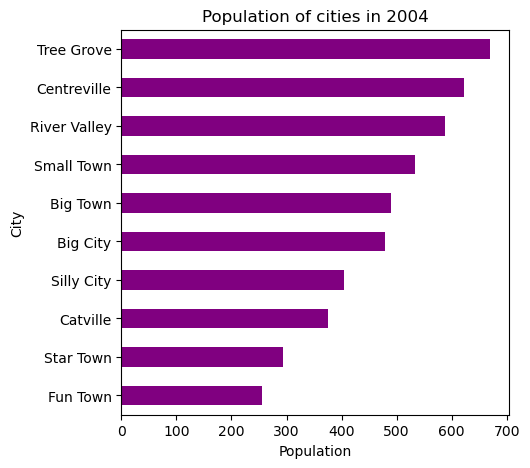

In [145]:
df2.sort_values(['2004'], ascending=True, axis=0, inplace=True)
df_2004=df2['2004']
df_2004.plot(kind='barh', figsize=(5, 5), color='purple')
plt.xlabel('Population')
plt.title('Population of cities in 2004')

# annotate value labels to each country
for index, value in enumerate(df_2004): 
    label = format(int(value), ',') # format int with commas

# place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

plt.show()


4. Pie Chart

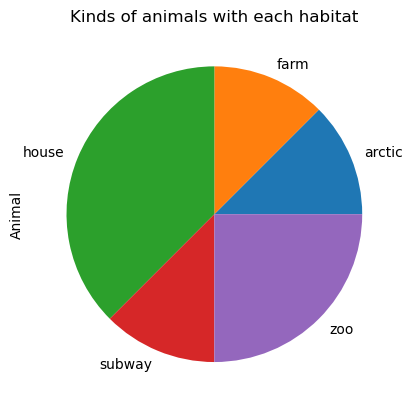

In [186]:
df_pie = df.groupby('Habitat',axis=0).count()
df_pie['Animal'].plot(kind='pie')
plt.title("Kinds of animals with each habitat")
plt.show()

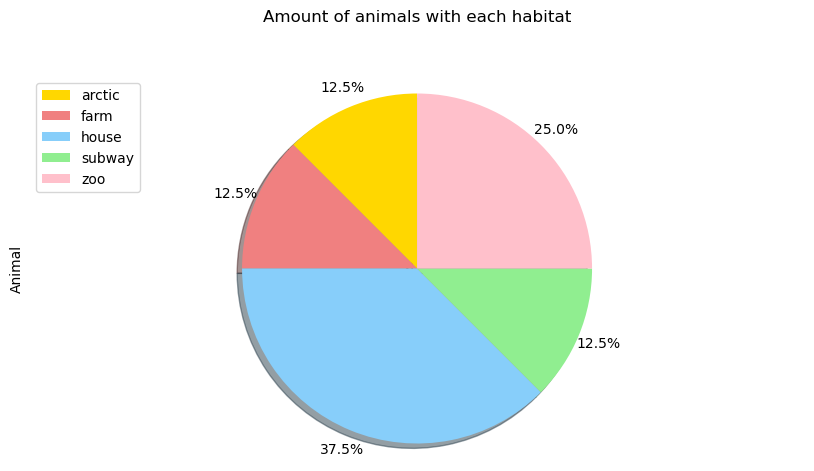

In [192]:
colors_list = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
df_piee = df.groupby('Habitat',axis=0).count()
df_piee['Animal'].plot(kind='pie',
                            figsize=(10, 5),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            )
# scale the title up by 12% to match pctdistance
plt.title("Amount of animals with each habitat", y=1.12) 
plt.axis('equal') 
plt.legend(labels=df_pie.index, loc='upper left') 
plt.show()
# Code format from IBM Data Science Lab

/var/folders/vs/7qwntrms6jj1hq_72684vm9m0000gn/T/ipykernel_873/2353709049.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_pie2 = df.groupby('Cool Factor',axis=0).sum()


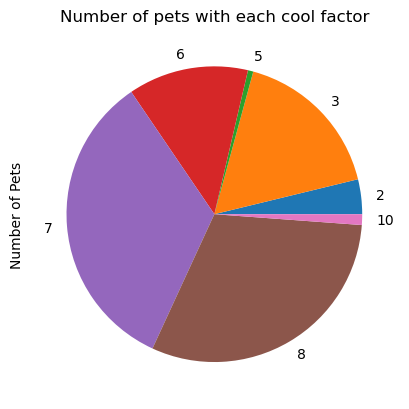

In [183]:
df_pie2 = df.groupby('Cool Factor',axis=0).sum()
df_pie2['Number of Pets'].plot(kind='pie')
plt.title("Number of pets with each cool factor")
plt.show()

5. Box Plot. Minimum, first quartile, median, third quartile, maximum, outliers, and inner quartile range.

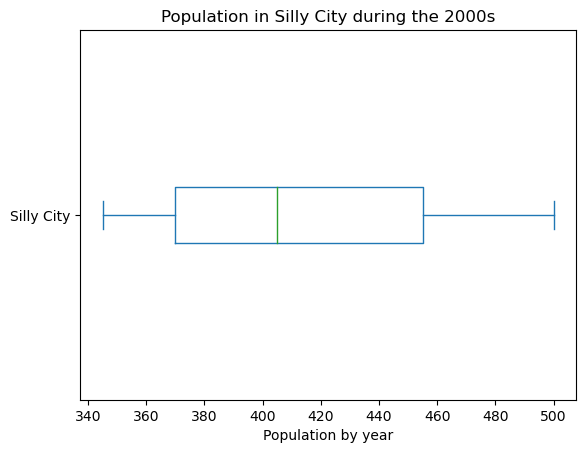

In [196]:
years = list(map(str, range(2000,2009)))
df_sc = df2.loc[['Silly City'],years].transpose()
df_sc.plot(kind='box',vert=False)
plt.title("Population in Silly City during the 2000s")
plt.xlabel('Population by year')
plt.show()

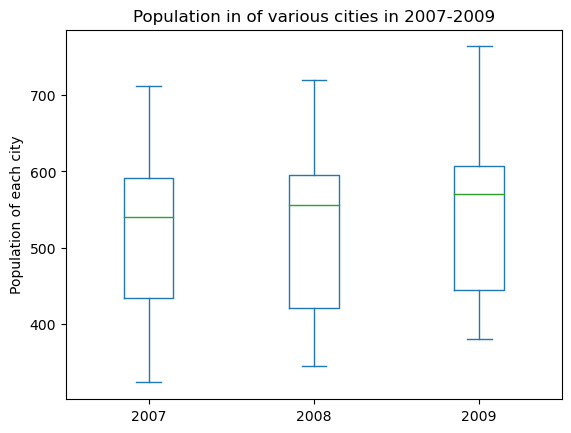

In [194]:
cities = ['Fun Town', 'Silly City', 'Tree Grove','Big City','Star Town','River Valley','Catville','Small Town','Big Town','Centreville']
df_2008 = df2.loc[cities,['2007','2008','2009']]
df_2008.plot(kind='box')
plt.title("Population in of various cities in 2007-2009")
plt.ylabel('Population of each city')
plt.show()

6. Scatter Plot

In [168]:
df

,Animal,Cool Factor,Habitat,Number of Pets
0,lion,5,zoo,2
1,dog,8,house,105
2,penguin,10,arctic,4
3,cow,7,farm,85
4,cat,3,house,58
5,mouse,2,house,13
6,rat,6,subway,45
7,flamingo,7,zoo,30


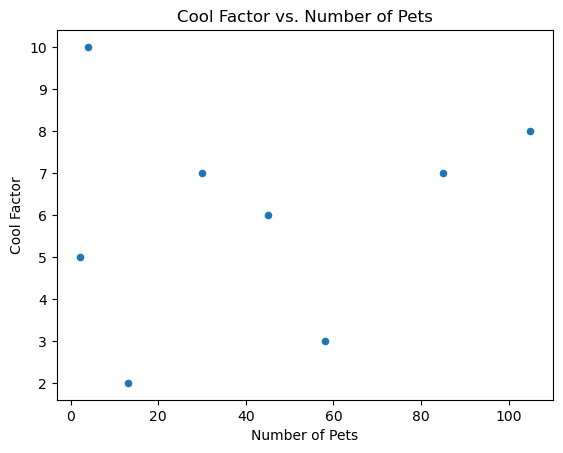

In [174]:
df_scat = df[['Number of Pets','Cool Factor']]
df_scat.plot(kind='scatter',x='Number of Pets', y='Cool Factor')
plt.title('Cool Factor vs. Number of Pets')
plt.show()

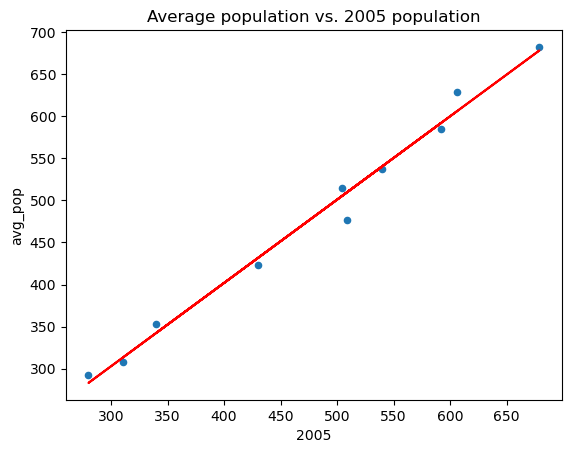

'Average Population = 1 * 2005_population + 6'

In [279]:
x = df2['2005']      # year on x-axis
y = df2['avg_pop']     # total on y-axis
fit = np.polyfit(x, y, deg=1)
df_scat = df2[['2005','avg_pop']]
df_scat.plot(kind='scatter',x='2005', y='avg_pop')
plt.title('Average population vs. 2005 population')
# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))
plt.show()
# print out the line of best fit
'Average Population = {0:.0f} * 2005_population + {1:.0f}'.format(fit[0], fit[1]) 

7. Subplots

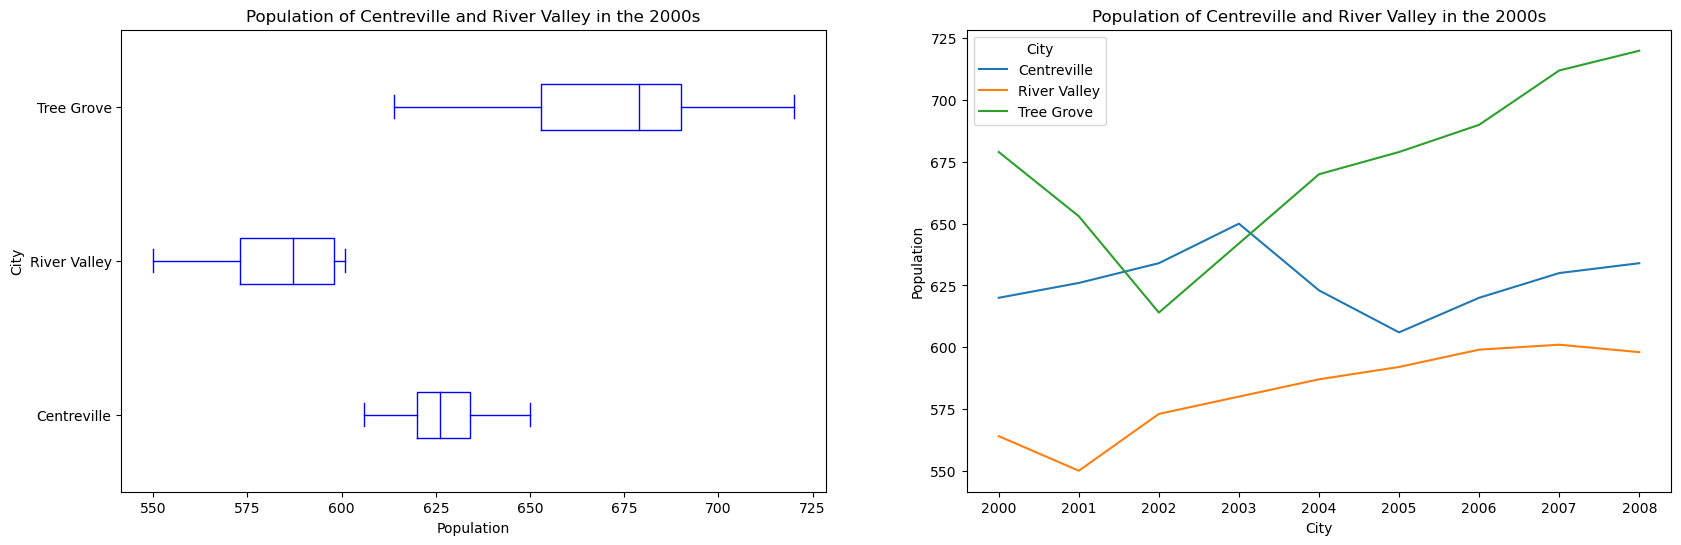

In [200]:
fig = plt.figure() # create figure
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
years = list(map(str, range(2000,2009)))
df_crt = df2.loc[['Centreville','River Valley','Tree Grove'],years].transpose()
# Subplot 1: Box plot
df_crt.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Population of Centreville and River Valley in the 2000s')
ax0.set_xlabel('Population')
ax0.set_ylabel('City')
# Subplot 2: Line plot
df_crt.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Population of Centreville and River Valley in the 2000s')
ax1.set_ylabel('Population')
ax1.set_xlabel('City')
plt.show()

8. Bubble Plots

In [343]:
years = list(map(str, range(2000, 2009)))
df2t = df2[years].transpose()
# cast the Years (the index) to type int
df2t.index = map(int, df2t.index)
# let's label the index. This will automatically be the column name when we reset the index
df2t.index.name = 'Year'
# reset index to bring the Year in as a column
df2t.reset_index(inplace=True)
# view the changes
df2t.head()

City,Year,Fun Town,Silly City,Tree Grove,Big City,Star Town,River Valley,Catville,Small Town,Big Town,Centreville
0,2000,200,345,679,402,238,564,329,500,459,620
1,2001,202,365,653,402,245,550,350,521,461,626
2,2002,207,370,614,400,257,573,362,550,467,634
3,2003,280,382,642,413,268,580,367,523,480,650
4,2004,256,405,670,478,293,587,375,533,490,623


In [281]:
# normalize data using min-max method
norm_FT = (df2t['Fun Town'] - df2t['Fun Town'].min()) / (df2t['Fun Town'].max() - df2t['Fun Town'].min())

# normalize Argentina data
norm_SC = (df2t['Silly City'] - df2t['Silly City'].min()) / (df2t['Silly City'].max() - df2t['Silly City'].min())

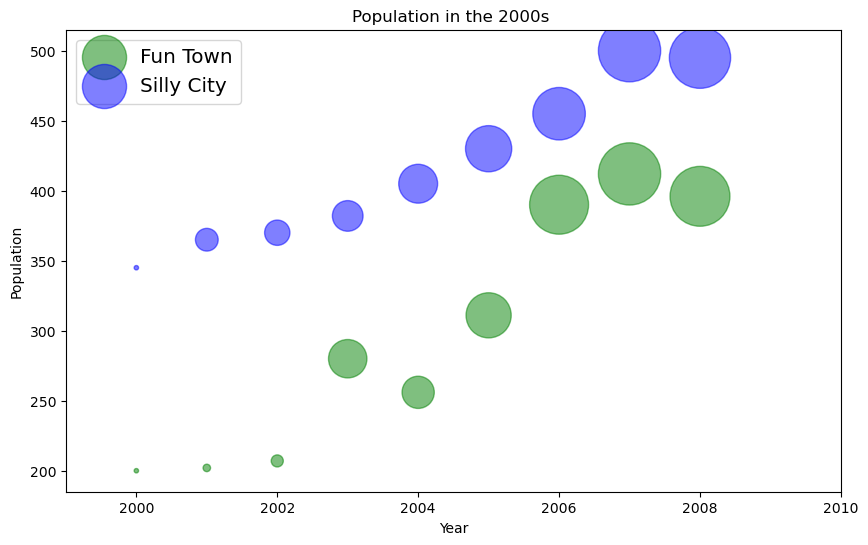

In [285]:
# Fun Town
ax0 = df2t.plot(kind='scatter',
                    x='Year',
                    y='Fun Town',
                    figsize=(10, 6),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_FT * 2000 + 10,  # pass in weights 
                    xlim=(1999, 2010)
                    )

# Silly City
ax1 = df2t.plot(kind='scatter',
                    x='Year',
                    y='Silly City',
                    alpha=0.5,
                    color="blue",
                    s=norm_SC * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Population')
ax0.set_title('Population in the 2000s ')
ax0.legend(['Fun Town', 'Silly City'], loc='upper left', fontsize='x-large')

9. Regression Plot

In [358]:
df2_new = df2
# Remove average column
df2_new.drop(['avg_pop'], axis=1, inplace=True)
# remove index
#df2_new = df2_new.reset_index('City')
# transpose data
df2_newT = df2_new.transpose()
# Add sum column
df2_newT['Total'] = df2_newT.sum(axis=1)
df2_newT.head()

City,Fun Town,Silly City,Tree Grove,Big City,Star Town,River Valley,Catville,Small Town,Big Town,Centreville,Total
2000,200,345,679,402,238,564,329,500,459,620,4336
2001,202,365,653,402,245,550,350,521,461,626,4375
2002,207,370,614,400,257,573,362,550,467,634,4434
2003,280,382,642,413,268,580,367,523,480,650,4585
2004,256,405,670,478,293,587,375,533,490,623,4710


In [359]:
df2_newT.columns

Index(['Fun Town', 'Silly City', 'Tree Grove', 'Big City', 'Star Town',
       'River Valley', 'Catville', 'Small Town', 'Big Town', 'Centreville',
       'Total'],
      dtype='object', name='City')

In [369]:
df2_new = df2_new.reset_index('City')

In [373]:
import seaborn as sns
years = list(map(str, range(2000, 2009)))
# ax=sns.regplot(x=,y='Total', data=df2_newT)
print('THIS FUNCTION IS CURRENTLY BROKEN')

THIS FUNCTION IS CURRENTLY BROKEN


In [ ]:
#plt.figure(figsize=(15, 10))
#sns.set(font_scale=1.5)
#sns.set_style('whitegrid')
#ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
#ax.set(xlabel='Year', ylabel='Total Immigration')
#ax.set_title('Total Immigration to Canada from 1980 - 2013')
#plt.show()

10. Waffle Chart

In [416]:
import matplotlib.patches as mpatches # needed for waffle Charts

df_waf = df2.loc[['Star Town', 'Tree Grove', 'Centreville']]
df_waf.drop(['avg_pop'], axis=1, inplace=True)
df_waf['Total'] = df_waf.sum(axis=1)
df_waf

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,Total
City,,,,,,,,,,,
Star Town,238,245,257,268,293,280,301,323,345,380,2930
Tree Grove,679,653,614,642,670,679,690,712,720,764,6823
Centreville,620,626,634,650,623,606,620,630,634,650,6293


In [417]:
# compute the proportion of each category with respect to the total
total_values = df_waf['Total'].sum()
category_proportions = df_waf['Total'] / total_values

# print out proportions
pd.DataFrame({"Category Proportion": category_proportions})

,Category Proportion
City,
Star Town,0.182600
Tree Grove,0.425215
Centreville,0.392185


In [418]:
width = 40 # width of chart
height = 10 # height of chart
total_num_tiles = width * height # total number of tiles
print(f'Total number of tiles is {total_num_tiles}.')

Total number of tiles is 400.


In [419]:
# compute the number of tiles for each category
tiles_per_category = (category_proportions * total_num_tiles).round().astype(int)

# print out number of tiles per category
pd.DataFrame({"Number of tiles": tiles_per_category})

,Number of tiles
City,
Star Town,73
Tree Grove,170
Centreville,157


In [420]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width), dtype = np.uint)
# define indices to loop through waffle chart
category_index = 0
tile_index = 0
# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1
        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
print ('Waffle chart populated!')

Waffle chart populated!


In [421]:
waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 

<Figure size 640x480 with 0 Axes>

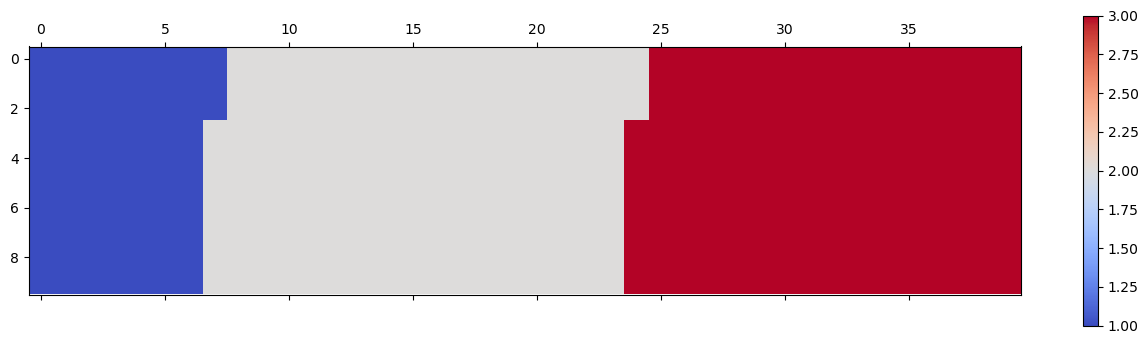

In [422]:
# instantiate a new figure object
fig = plt.figure()
# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
plt.show()

<Figure size 640x480 with 0 Axes>

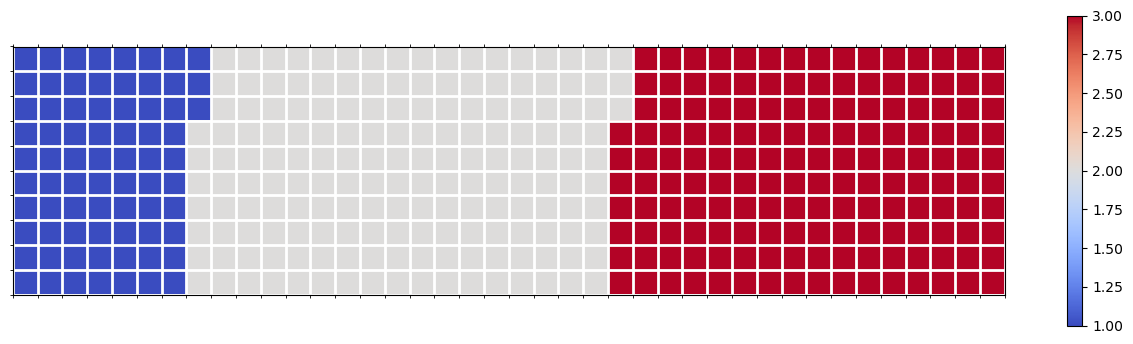

In [423]:
# instantiate a new figure object
fig = plt.figure()
# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
# get the axis
ax = plt.gca()
# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
plt.xticks([])
plt.yticks([])
plt.show()

<Figure size 640x480 with 0 Axes>

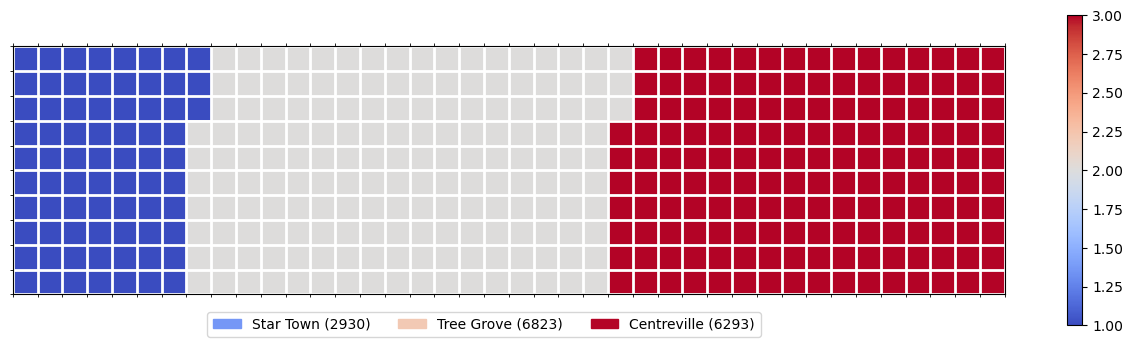

In [425]:
import matplotlib.patches as mpatches # needed for waffle Charts
# instantiate a new figure object
fig = plt.figure()
# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
# get the axis
ax = plt.gca()
# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
plt.xticks([])
plt.yticks([])
# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_waf['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_waf.index.values):
    label_str = category + ' (' + str(df_waf['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_waf.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )
plt.show()

#### Waffle Chart General Function

In [430]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_waf.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    plt.show()

In [431]:
width = 40 # width of chart
height = 10 # height of chart

categories = df_waf.index.values # categories
values = df_waf['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

Total number of tiles is 400
Star Town: 73
Tree Grove: 170
Centreville: 157


<Figure size 640x480 with 0 Axes>

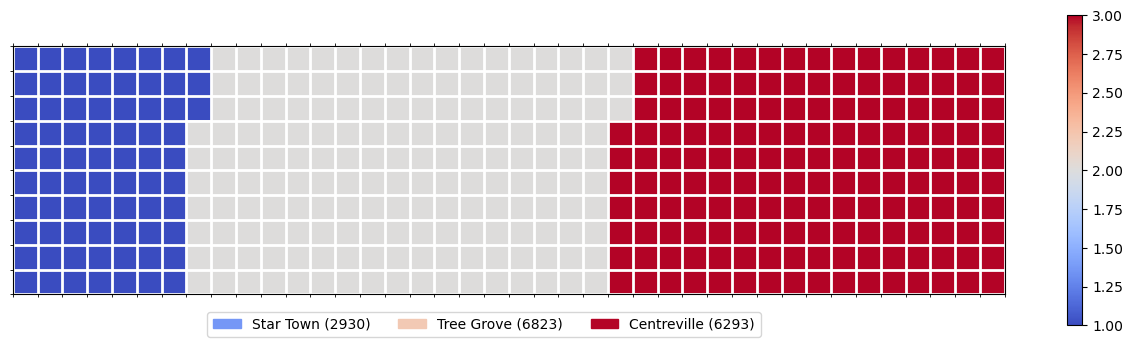

In [432]:
create_waffle_chart(categories, values, height, width, colormap)

11. Word Cloud

12. Maps with Folium

In [444]:
#import piplite
#await piplite.install(['openpyxl==3.0.9', 'folium'])
#!pip3 install folium==0.5.0
#import folium
# General world map
world_map = folium.map()
world_map

ModuleNotFoundError: No module named 'piplite'

In [ ]:
# World map around canada
canada_map = folium.map(
    location = [56.130,-106.35],
    zoom_start = 4
    # good for rivers and coastal zones
    tiles = 'Stamen Toner'
    # good for hill shading and natural vegetation colors
    #tiles = 'Stamen Terrain'
)
# create a feature group
ontario = folium.map.FeatureGroup()
# style the feature group
ontario.add_child(
    folium.feature.CircleMarker(
        [51.25, -85.32], radius = 5,
        color = "red", fill_color = "Red"
    )
)
canada_map.add_child(ontario)
folium.Marker([51.25,-85.32],
    popup='Ontario').add_to(canada_map)
canada_map

In [ ]:
world_map = folium.Map(
    zoom_start = 2,
    tiles = 'Mapbox Bright'

)
world_geo = r'world_countries.json'
world_map.chloropleth(
    geo_peth=world_geo,
    data=df_canada
    columnsd=['Country','Total'],
    key_on='feature.properties.name',
    fill_color='Y1OrRd',
    legend_name='Immigration to Canada'
)
world_map